In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class module:
    def __init__(self):
      (x_train, y_train),(x_test, y_test) = mnist.load_data()
      self.x_train = x_train
      self.y_train = y_train
      self.x_test = x_test
      


обучающая выборка

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

нормализация входных данных

In [4]:
x_train = x_train / 255
x_test = x_test / 255

переобразование выходных значений в веркторы по категориям 

In [5]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [6]:
model = keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')      
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


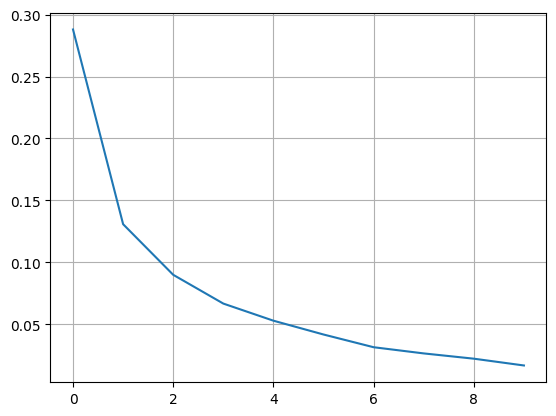

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_cat,batch_size=32, epochs=10, validation_split=0.2, verbose=0)

plt.plot(history.history['loss'])
plt.grid()
plt.show()

проверка распознавания цифр

In [8]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9764


[0.09185542166233063, 0.9764000177383423]

1/1 [==============================] - 0s 14ms/step
[[6.2457546e-09 6.4890870e-12 1.9629913e-07 1.0261547e-05 3.6497423e-14
  2.3960845e-11 6.1311707e-16 9.9995923e-01 1.0401175e-09 3.0268013e-05]]
Распознанная цифра: 7
7


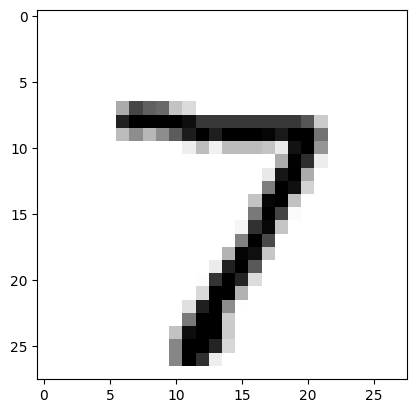

1/1 [==============================] - 0s 14ms/step
[[1.0832693e-10 1.6882751e-06 9.9999833e-01 1.4559345e-09 1.9426409e-17
  7.1748066e-11 9.6409554e-11 1.6711623e-19 1.3426238e-09 6.9457379e-14]]
Распознанная цифра: 2
2


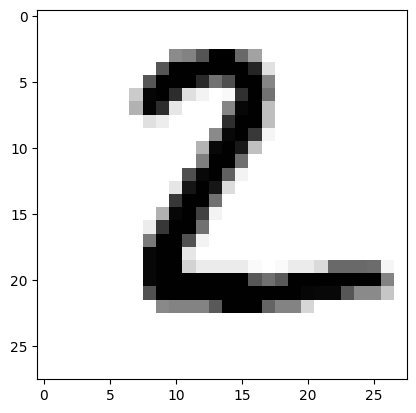

1/1 [==============================] - 0s 14ms/step
[[8.1099608e-07 9.9453223e-01 8.3525432e-04 1.0006409e-06 3.1561751e-05
  1.9676606e-06 4.9993123e-06 1.0839734e-03 3.5080791e-03 9.8681554e-08]]
Распознанная цифра: 1
1


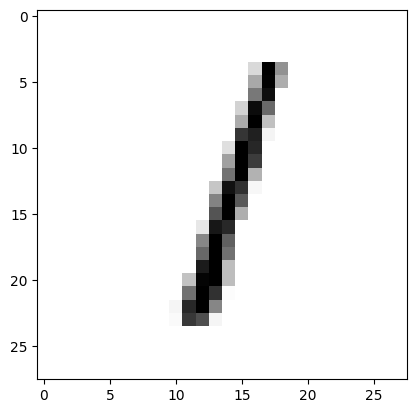

1/1 [==============================] - 0s 14ms/step
[[9.9999177e-01 2.7623853e-13 7.0947467e-06 1.1189236e-11 4.7390161e-11
  5.1301079e-09 9.6133863e-07 6.1304483e-08 1.6689204e-13 5.2942619e-11]]
Распознанная цифра: 0
0


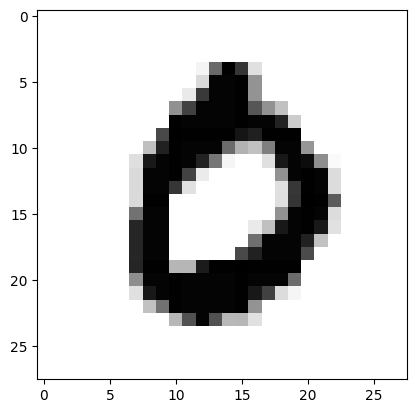

1/1 [==============================] - 0s 14ms/step
[[2.5786917e-08 3.4688089e-13 1.7499818e-09 4.1113554e-12 9.9991381e-01
  3.5345292e-12 2.0143245e-09 2.6084405e-07 8.4538249e-10 8.5996777e-05]]
Распознанная цифра: 4
4


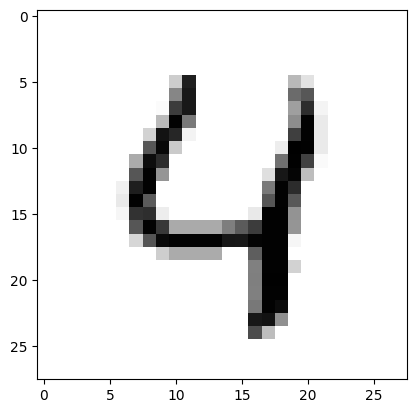

1/1 [==============================] - 0s 13ms/step
[[5.4506444e-08 9.9866390e-01 4.5658694e-06 1.7436033e-08 1.7003742e-06
  1.5403593e-09 7.2397373e-09 1.2535078e-03 7.6350363e-05 5.3841376e-10]]
Распознанная цифра: 1
1


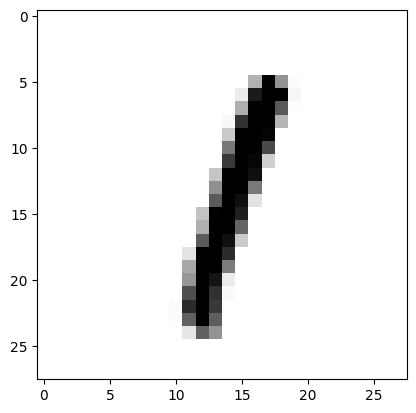

1/1 [==============================] - 0s 13ms/step
[[4.5314755e-11 7.4995843e-10 1.9308868e-09 1.0319371e-10 9.9517667e-01
  6.9363459e-08 3.5799247e-10 1.4936981e-07 1.4500337e-04 4.6780193e-03]]
Распознанная цифра: 4
4


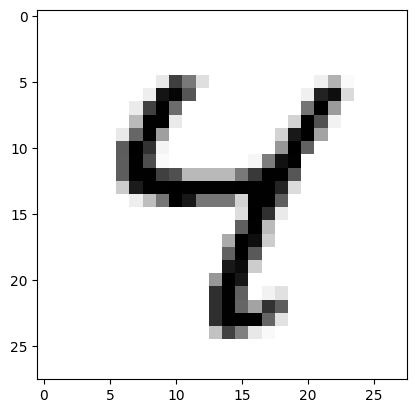

1/1 [==============================] - 0s 16ms/step
[[1.2594299e-10 1.8064631e-07 2.2079078e-06 4.6185011e-04 4.1064068e-05
  1.1798495e-08 1.3771202e-12 1.0058255e-06 4.0153845e-09 9.9949372e-01]]
Распознанная цифра: 9
9


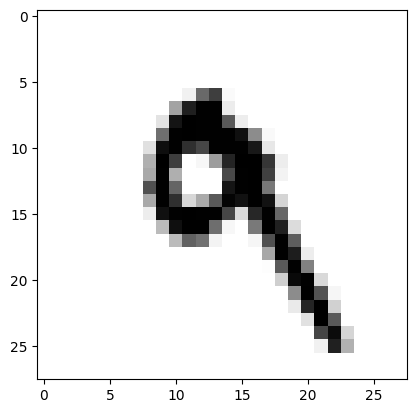

1/1 [==============================] - 0s 13ms/step
[[4.3774790e-13 1.2225702e-06 9.2120921e-08 2.3258540e-10 4.7460684e-08
  9.9627340e-01 3.3646391e-03 7.2471008e-11 3.5938545e-04 1.2691362e-06]]
Распознанная цифра: 5
5


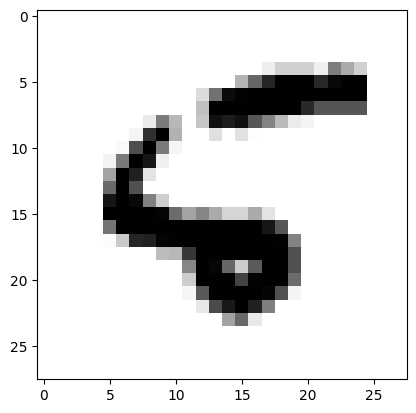

1/1 [==============================] - 0s 14ms/step
[[2.8055276e-13 9.5600765e-16 8.0689045e-15 5.5182494e-11 1.8833010e-06
  5.3441415e-13 9.8742651e-18 4.2798729e-06 1.9406751e-07 9.9999356e-01]]
Распознанная цифра: 9
9


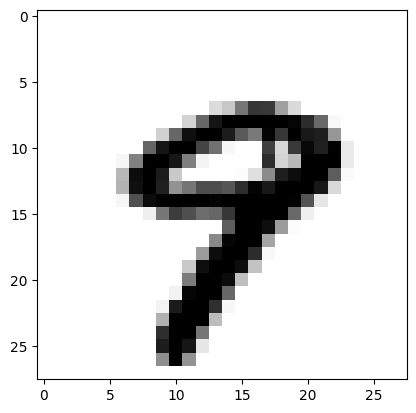

In [13]:
for i in range(10):
  n = i 
  x = np.expand_dims(x_test[n], axis=0)
  res = model.predict(x)
  print(res)
  print(f'Распознанная цифра: {np.argmax(res)}')
  print(y_test[i])
  plt.imshow(x_test[n], cmap = plt.cm.binary)
  plt.show()

In [10]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)
print(pred[:20])
print(y_test[:20])

313/313 [==============================] - 0s 1ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


[ True  True  True ...  True  True  True]
[8 2 7 3 0 9 0 2 2 8 1 3 9 8 9 9 2 3 9 4 2 9 0 5 8 8 2 6 8 7 0 5 9 2 4 9 5
 9 9 7 3 2 9 6 3 8 7 2 5 7 7 6 5 0 7 0 2 8 5 7 4 9 2 0 9 2 9 9 0 0 9 0 1 9
 2 0 9 0 0 8 1 4 4 4 2 8 0 1 3 7 0 2 5 5 8 8 2 0 2 9 0 7 9 1 4 9 0 8 5 7 0
 8 4 2 8 2 8 4 1 2 2 2 5 8 2 0 2 0 9 7 7 8 5 3 4 2 2 4 9 4 5 3 0 4 9 4 8 9
 8 4 1 8 4 4 6 8 0 5 2 7 5 0 0 9 9 3 8 8 9 0 8 9 8 8 8 3 8 2 4 9 7 8 6 5 1
 7 8 7 8 6 4 6 8 5 7 2 8 8 8 8 8 8 8 8 5 5 9 0 6 9 9 2 2 2 2 8 5 4 1 7 5 3
 5 6 8 0 0 0 0 0 7 7 0 8 8 6]
236 / 10000
המספר שנקבע: 8


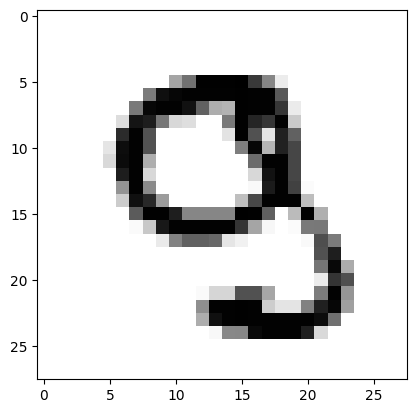

המספר הנכון: 9
המספר שנקבע: 2


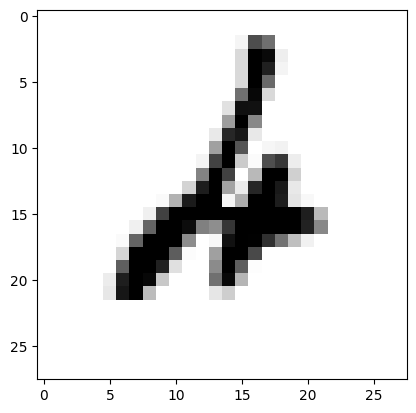

המספר הנכון: 4
המספר שנקבע: 7


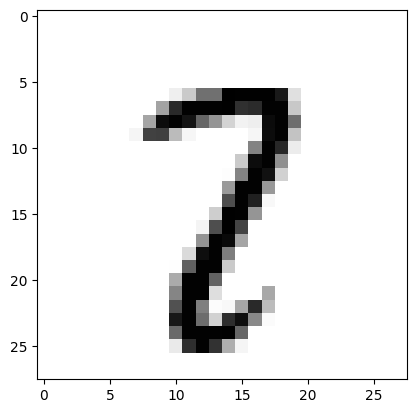

המספר הנכון: 2
המספר שנקבע: 3


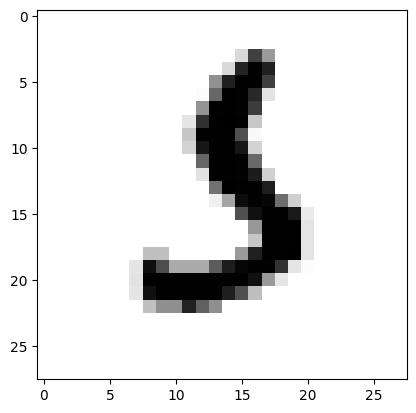

המספר הנכון: 5
המספר שנקבע: 0


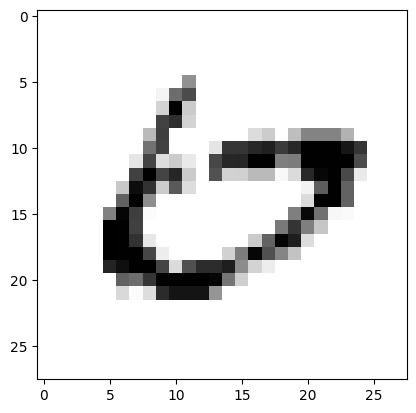

המספר הנכון: 6
המספר שנקבע: 9


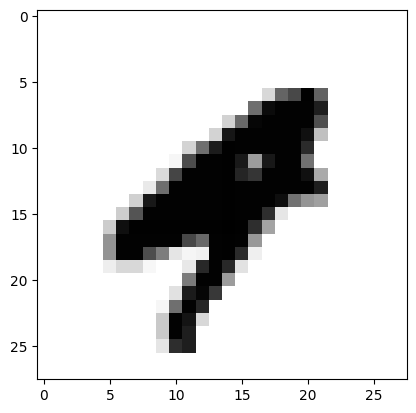

המספר הנכון: 4
המספר שנקבע: 0


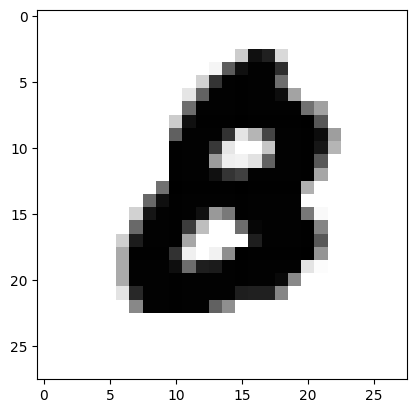

המספר הנכון: 8
המספר שנקבע: 2


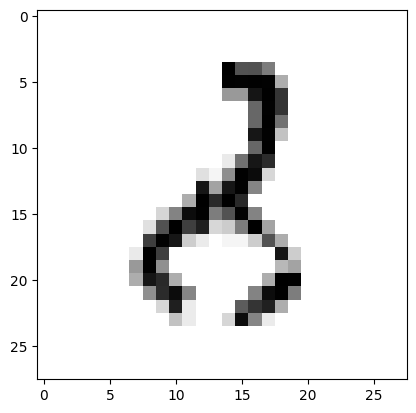

המספר הנכון: 8
המספר שנקבע: 2


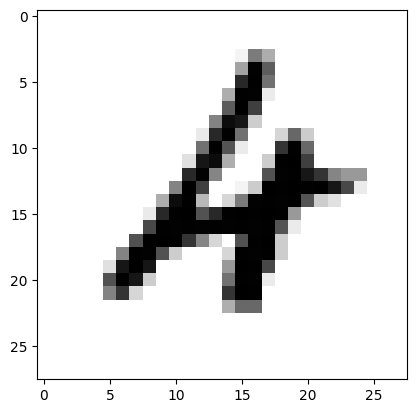

המספר הנכון: 4
המספר שנקבע: 8


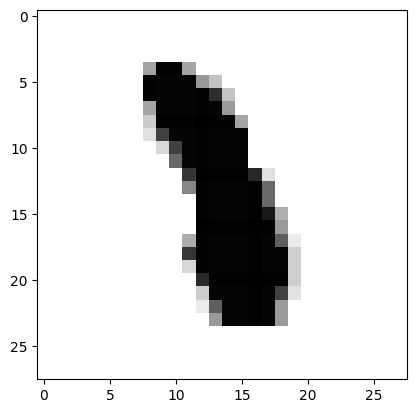

המספר הנכון: 1
המספר שנקבע: 1


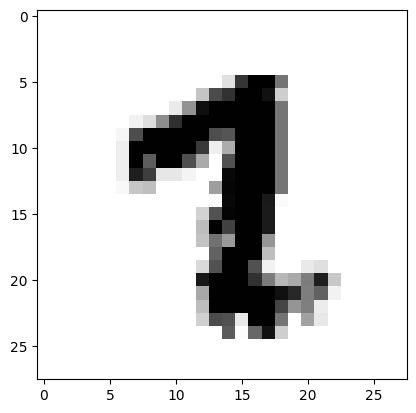

המספר הנכון: 2
המספר שנקבע: 3


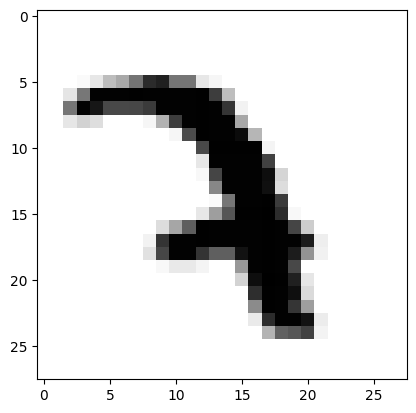

המספר הנכון: 7
המספר שנקבע: 9


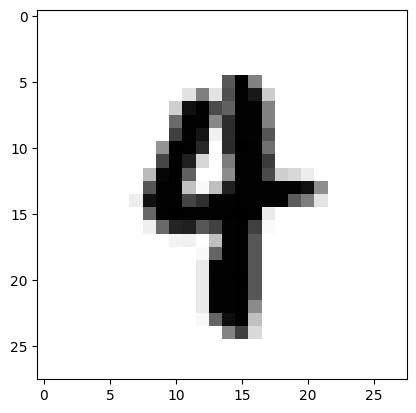

המספר הנכון: 4
המספר שנקבע: 8


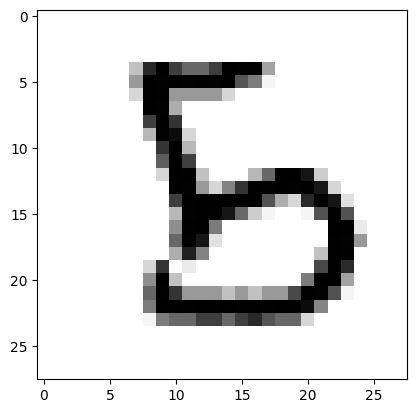

המספר הנכון: 5
המספר שנקבע: 9


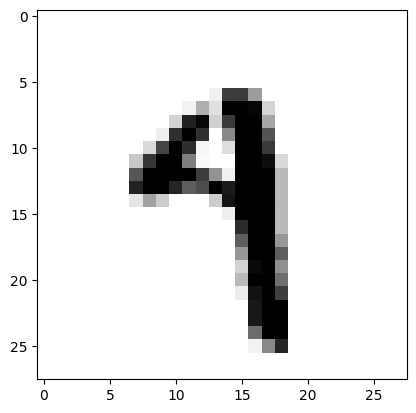

המספר הנכון: 4
המספר שנקבע: 9


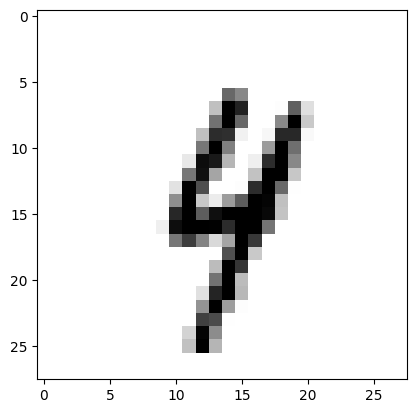

המספר הנכון: 4
המספר שנקבע: 2


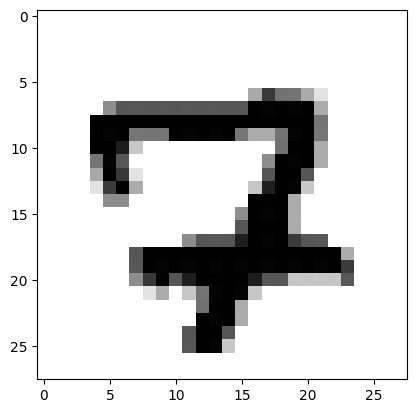

המספר הנכון: 7
המספר שנקבע: 3


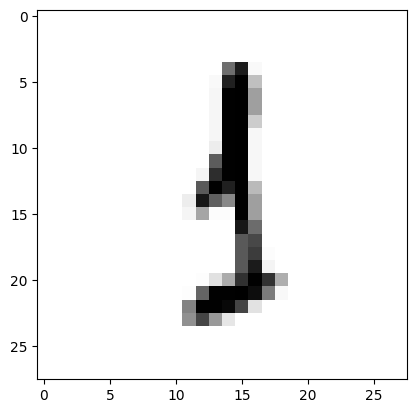

המספר הנכון: 1
המספר שנקבע: 9


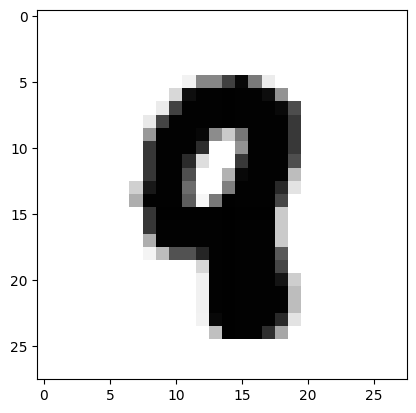

המספר הנכון: 8
המספר שנקבע: 4


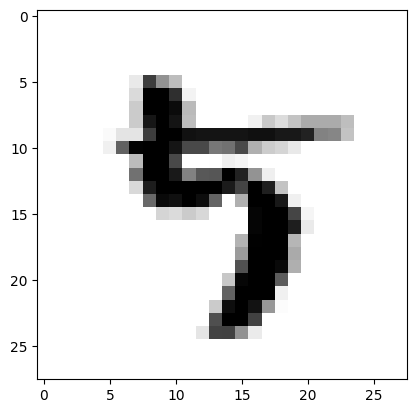

המספר הנכון: 5
המספר שנקבע: 2


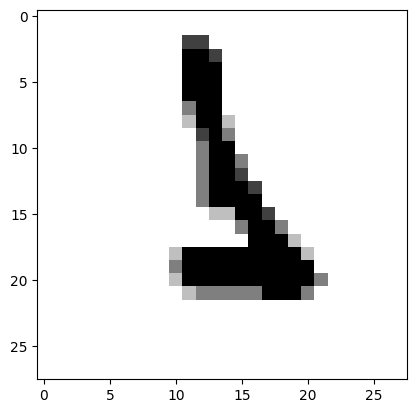

המספר הנכון: 1
המספר שנקבע: 9


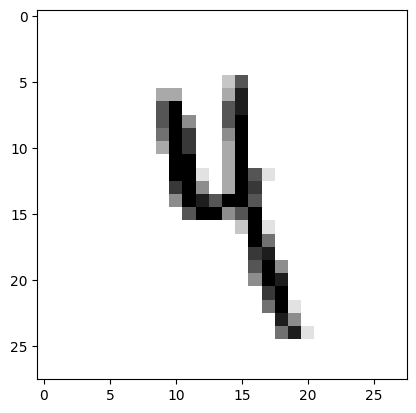

המספר הנכון: 4
המספר שנקבע: 0


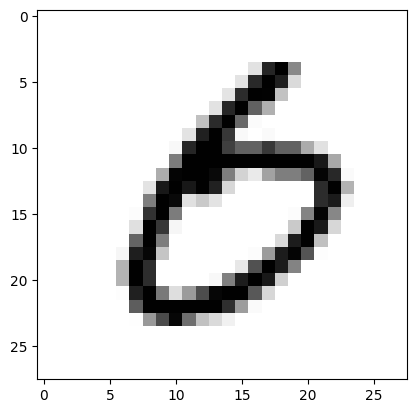

המספר הנכון: 6
המספר שנקבע: 5


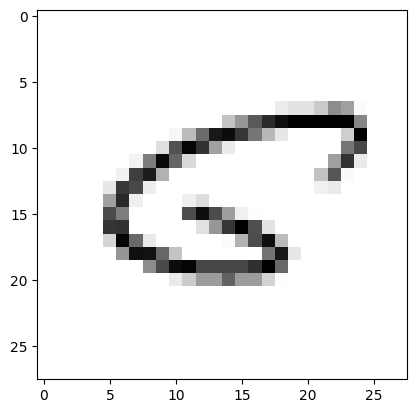

המספר הנכון: 6
המספר שנקבע: 8


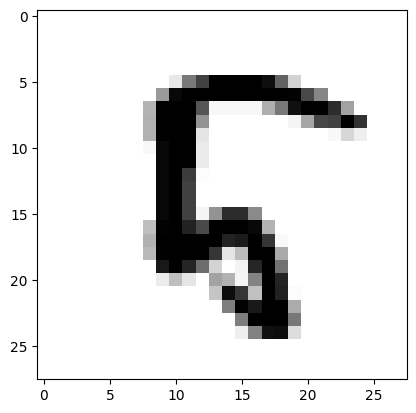

המספר הנכון: 5
המספר שנקבע: 8


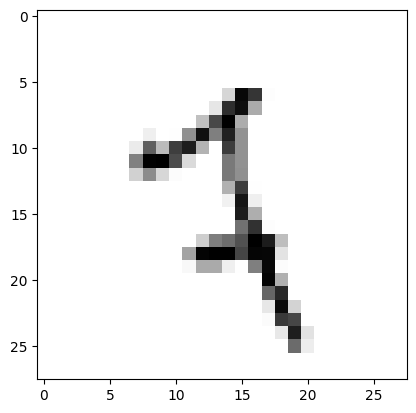

המספר הנכון: 7
המספר שנקבע: 2


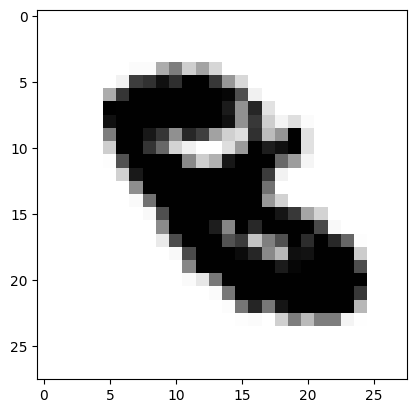

המספר הנכון: 8
המספר שנקבע: 6


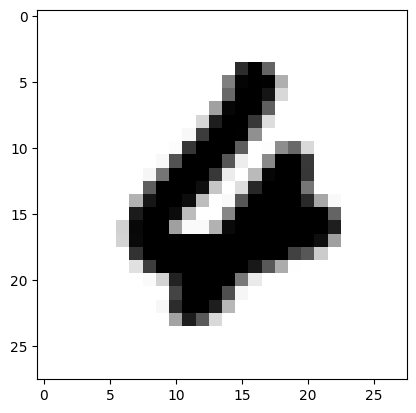

המספר הנכון: 4
המספר שנקבע: 8


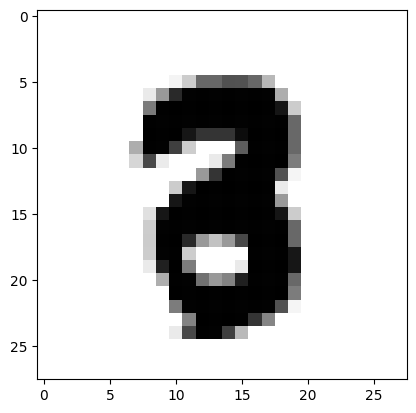

המספר הנכון: 3
המספר שנקבע: 7


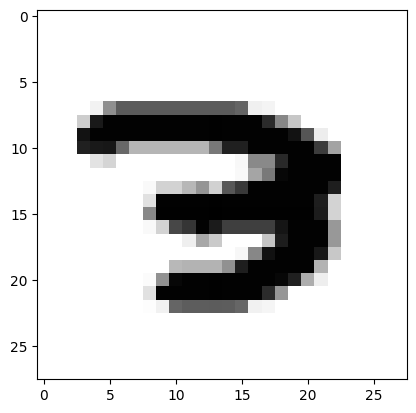

המספר הנכון: 3
המספר שנקבע: 0


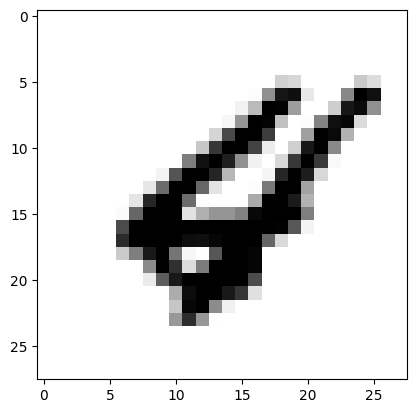

המספר הנכון: 4
המספר שנקבע: 5


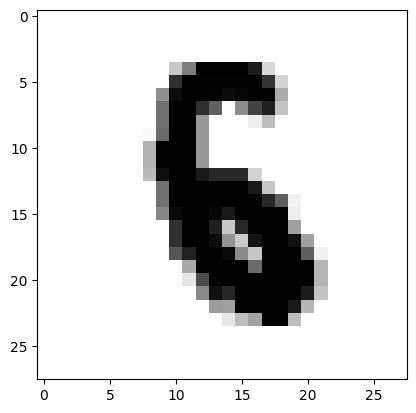

המספר הנכון: 6
המספר שנקבע: 9


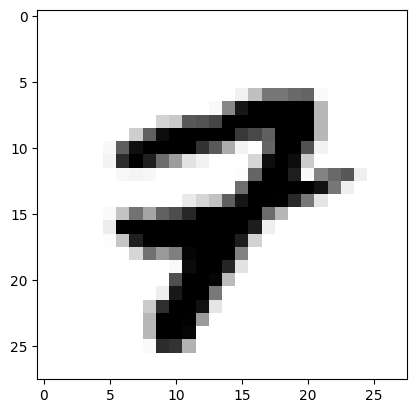

המספר הנכון: 7
המספר שנקבע: 2


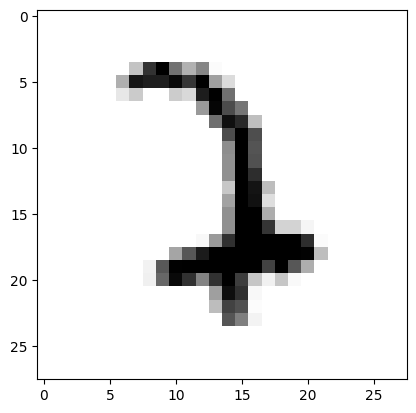

המספר הנכון: 7
המספר שנקבע: 4


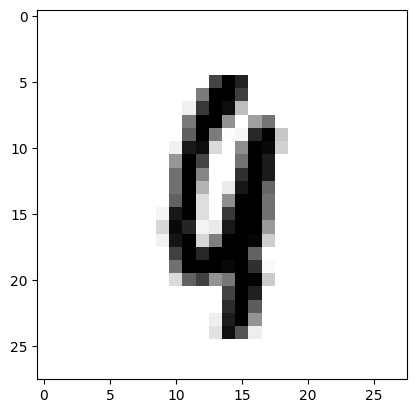

המספר הנכון: 9
המספר שנקבע: 9


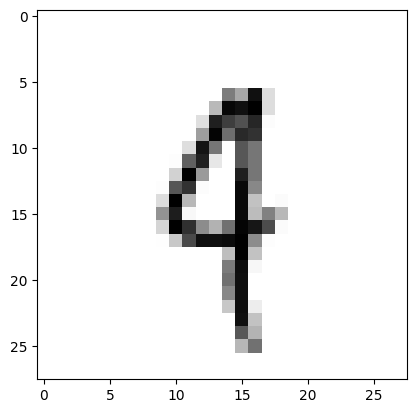

המספר הנכון: 4
המספר שנקבע: 5


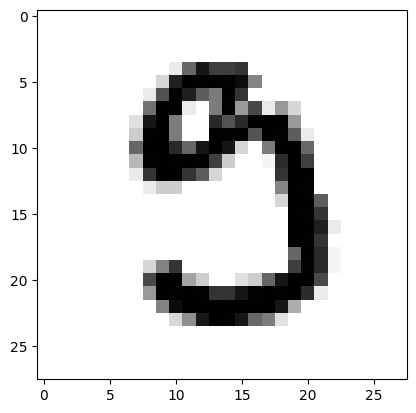

המספר הנכון: 9
המספר שנקבע: 9


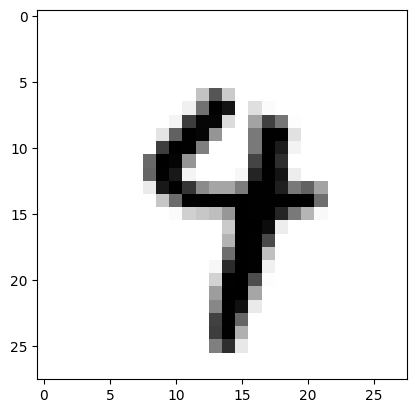

המספר הנכון: 4
המספר שנקבע: 9


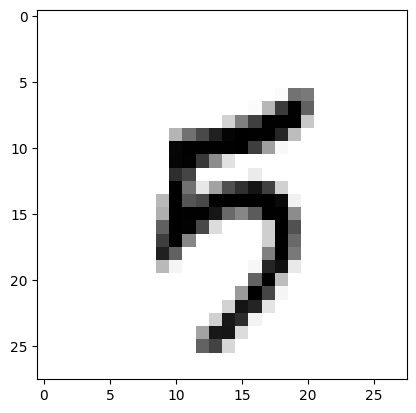

המספר הנכון: 5
המספר שנקבע: 7


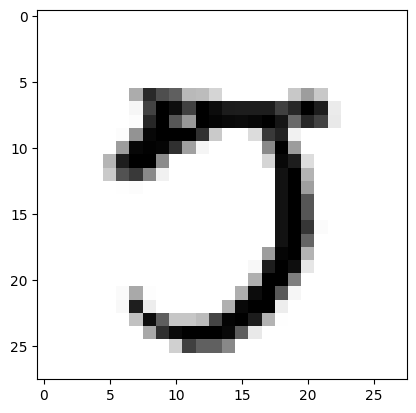

המספר הנכון: 5
המספר שנקבע: 3


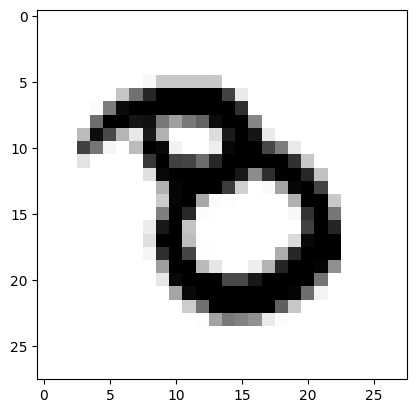

המספר הנכון: 8
המספר שנקבע: 2


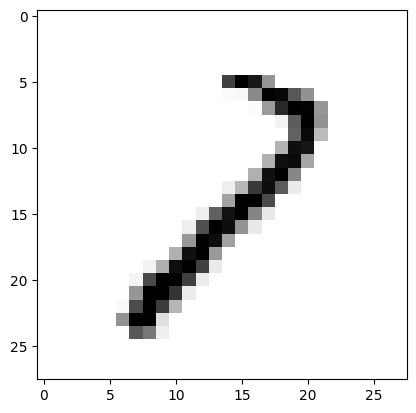

המספר הנכון: 7
המספר שנקבע: 9


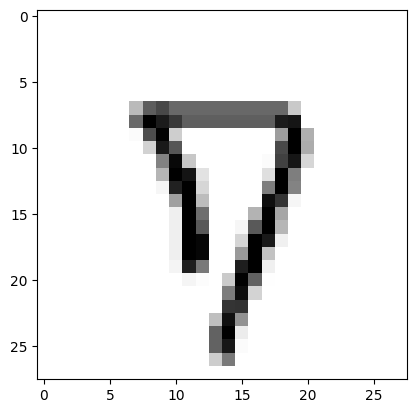

המספר הנכון: 7
המספר שנקבע: 6


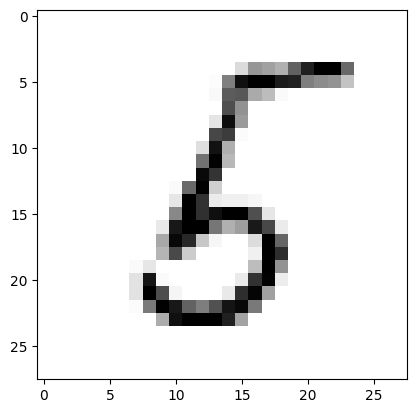

המספר הנכון: 5
המספר שנקבע: 3


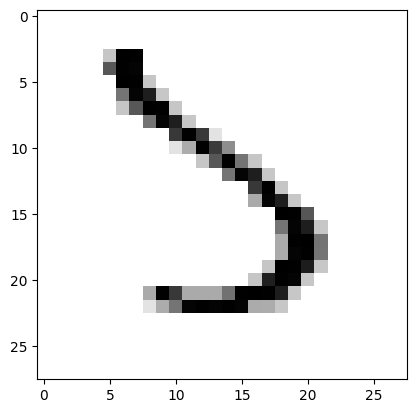

המספר הנכון: 5
המספר שנקבע: 8


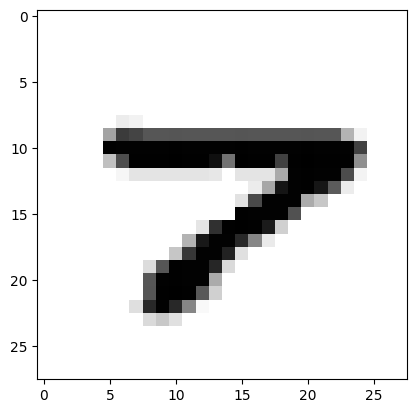

המספר הנכון: 7
המספר שנקבע: 7


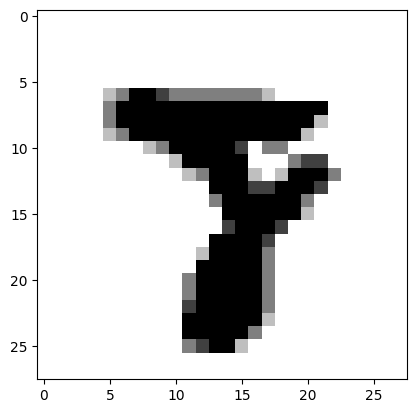

המספר הנכון: 8
המספר שנקבע: 2


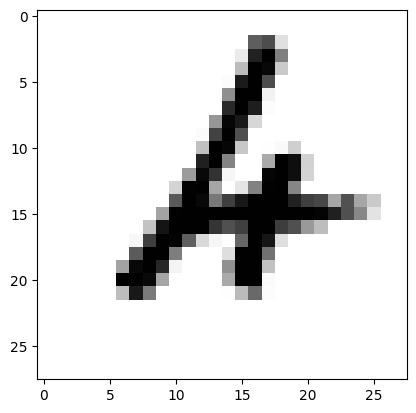

המספר הנכון: 4
המספר שנקבע: 5


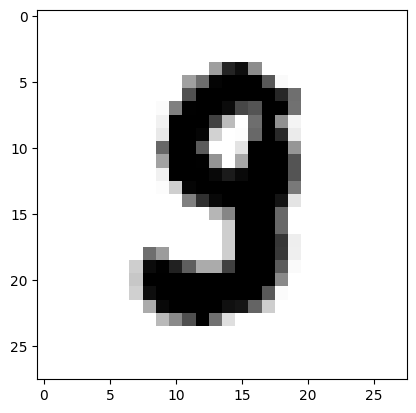

המספר הנכון: 9
המספר שנקבע: 7


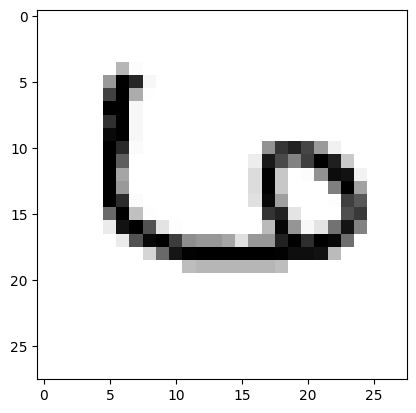

המספר הנכון: 6
המספר שנקבע: 7


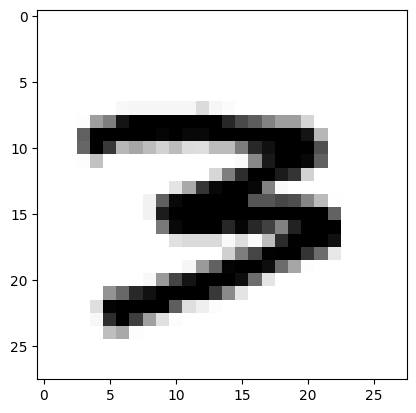

המספר הנכון: 3
המספר שנקבע: 6


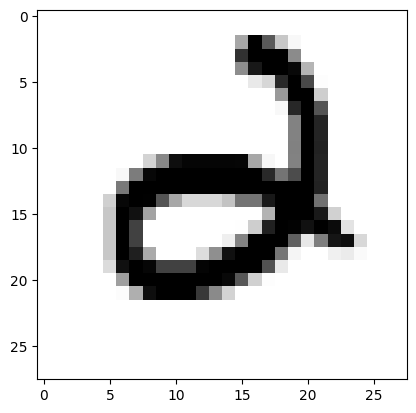

המספר הנכון: 2
המספר שנקבע: 5


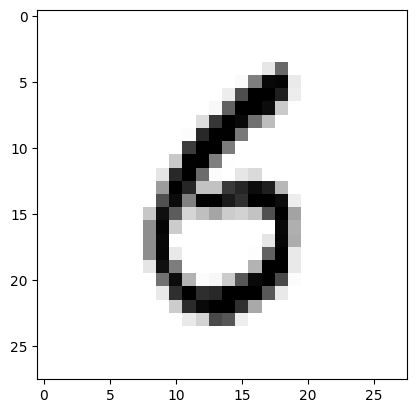

המספר הנכון: 6
המספר שנקבע: 0


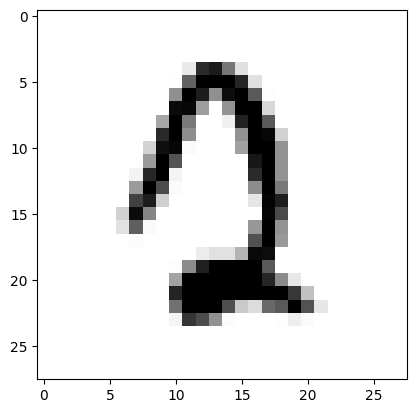

המספר הנכון: 2
המספר שנקבע: 7


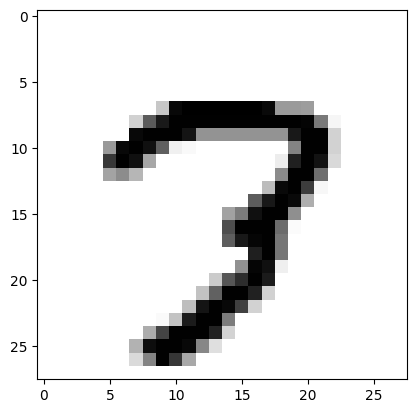

המספר הנכון: 3
המספר שנקבע: 0


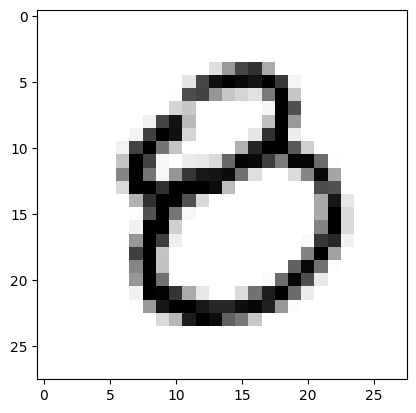

המספר הנכון: 8
המספר שנקבע: 2


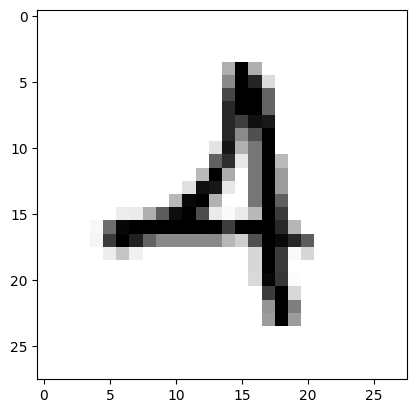

המספר הנכון: 4
המספר שנקבע: 8


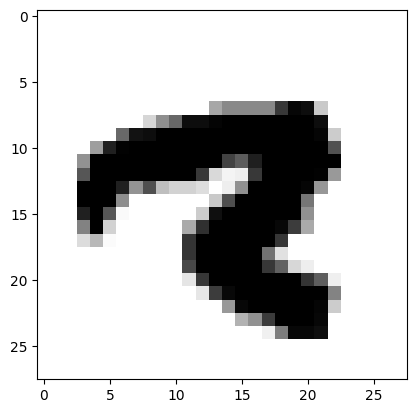

המספר הנכון: 2
המספר שנקבע: 5


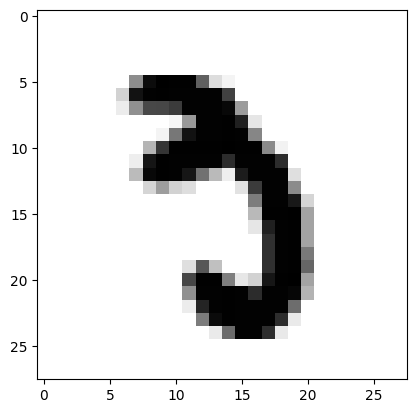

המספר הנכון: 3
המספר שנקבע: 7


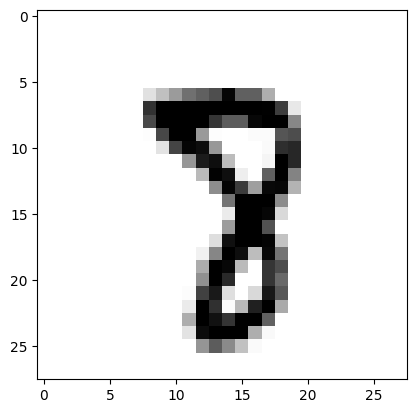

המספר הנכון: 8
המספר שנקבע: 4


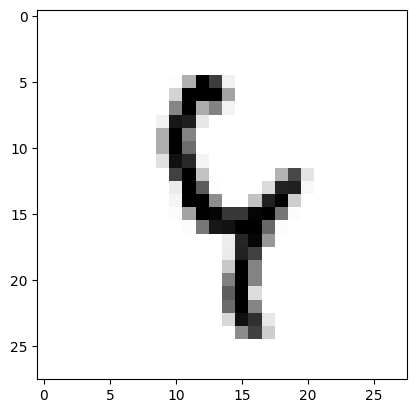

המספר הנכון: 9
המספר שנקבע: 9


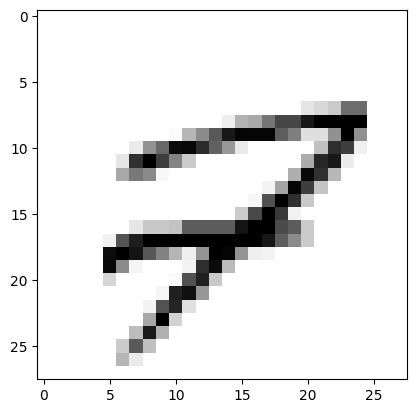

המספר הנכון: 7
המספר שנקבע: 2


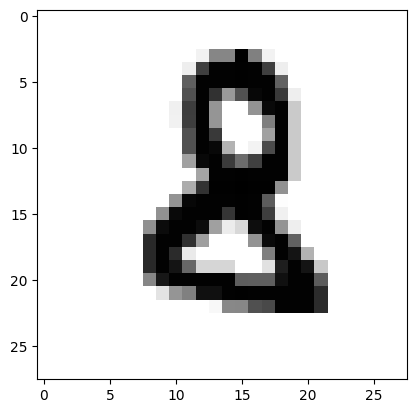

המספר הנכון: 8
המספר שנקבע: 0


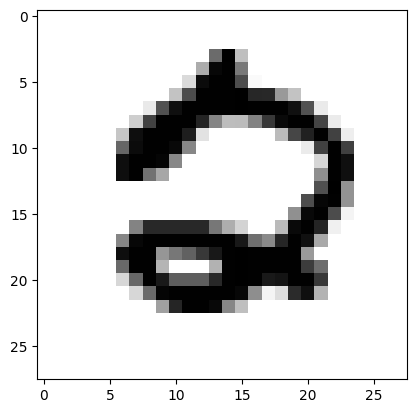

המספר הנכון: 2
המספר שנקבע: 9


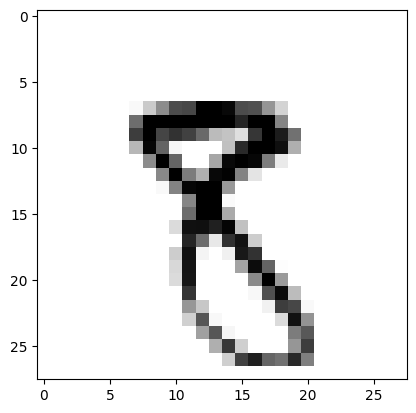

המספר הנכון: 8
המספר שנקבע: 2


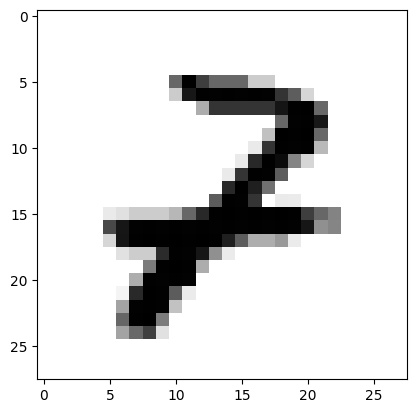

המספר הנכון: 7
המספר שנקבע: 9


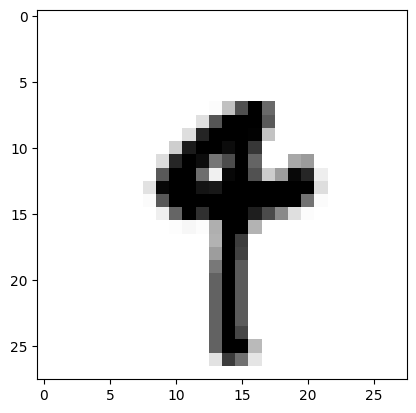

המספר הנכון: 4
המספר שנקבע: 9


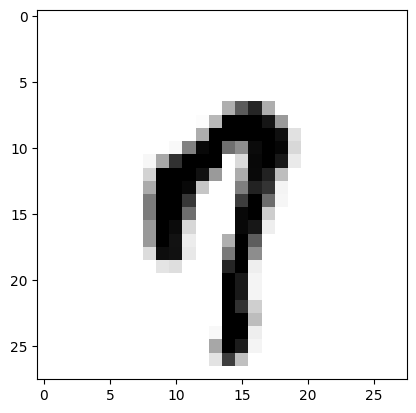

המספר הנכון: 7
המספר שנקבע: 0


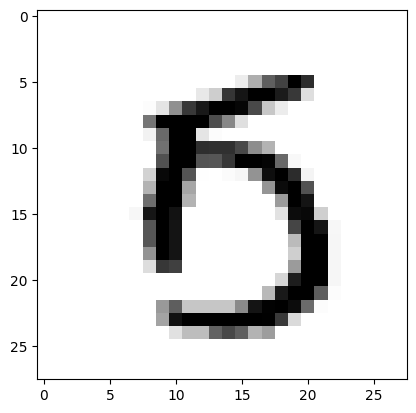

המספר הנכון: 5
המספר שנקבע: 0


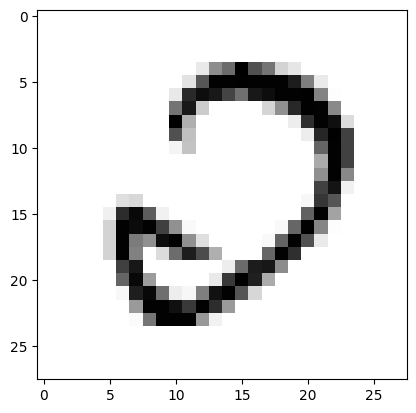

המספר הנכון: 2
המספר שנקבע: 9


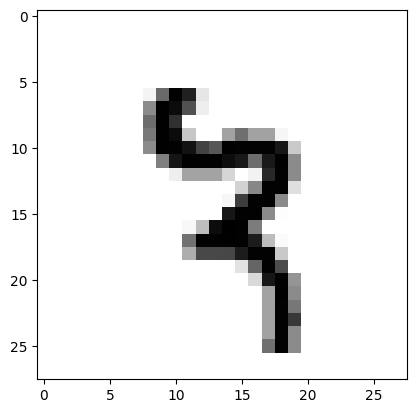

המספר הנכון: 3
המספר שנקבע: 0


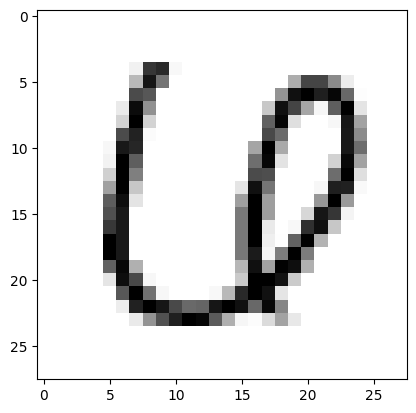

המספר הנכון: 6
המספר שנקבע: 1


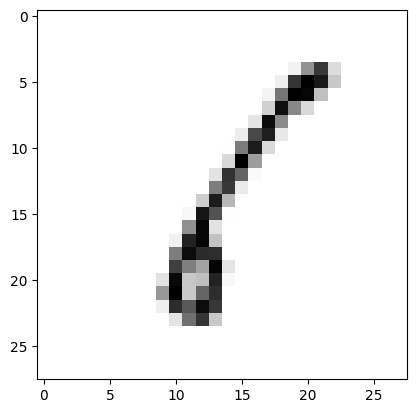

המספר הנכון: 6
המספר שנקבע: 9


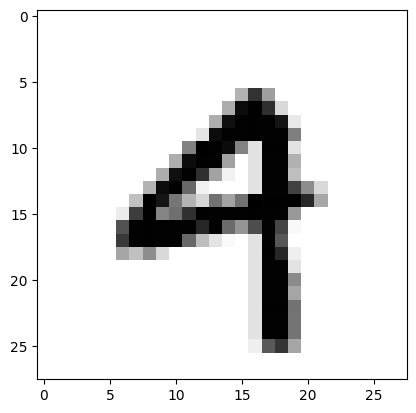

המספר הנכון: 4
המספר שנקבע: 2


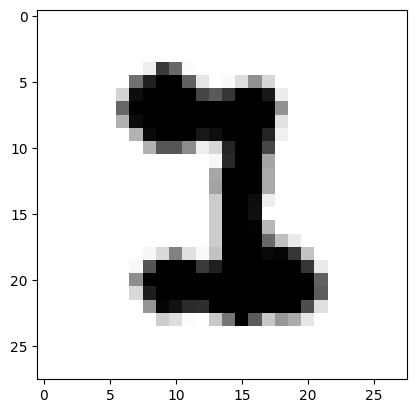

המספר הנכון: 1
המספר שנקבע: 0


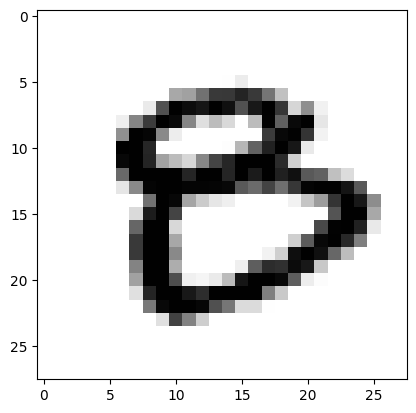

המספר הנכון: 8
המספר שנקבע: 9


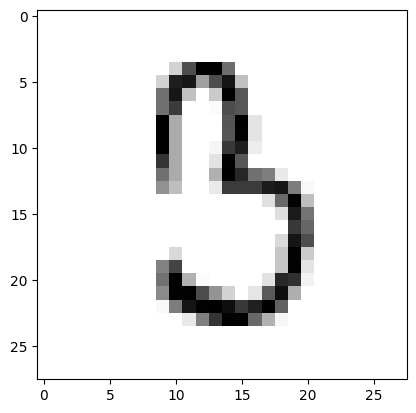

המספר הנכון: 3
המספר שנקבע: 0


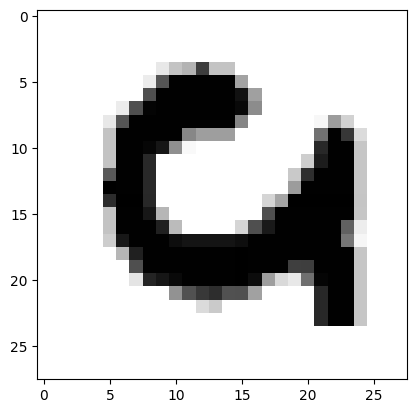

המספר הנכון: 9
המספר שנקבע: 0


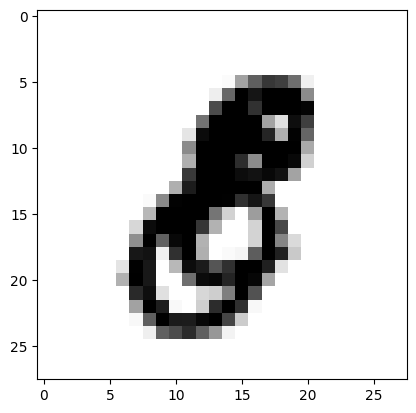

המספר הנכון: 8
המספר שנקבע: 8


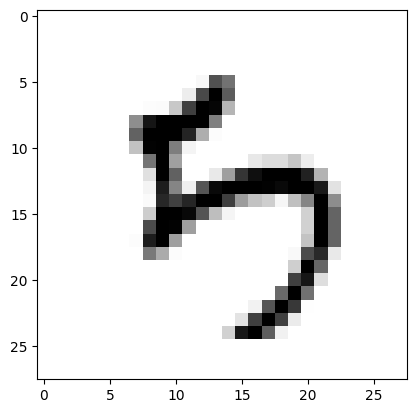

המספר הנכון: 5
המספר שנקבע: 1


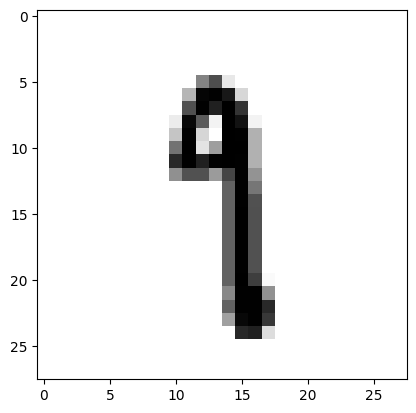

המספר הנכון: 9
המספר שנקבע: 4


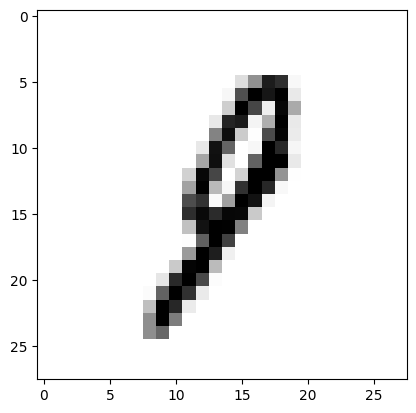

המספר הנכון: 9
המספר שנקבע: 4


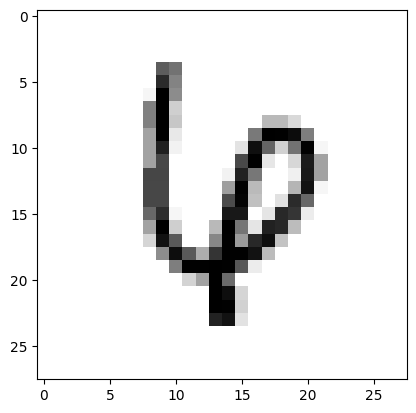

המספר הנכון: 6
המספר שנקבע: 4


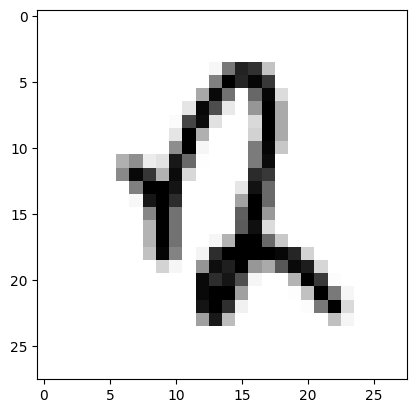

המספר הנכון: 2
המספר שנקבע: 2


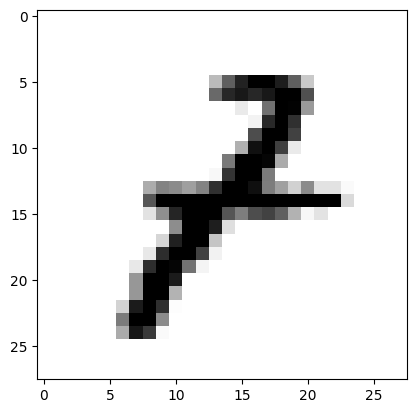

המספר הנכון: 7
המספר שנקבע: 8


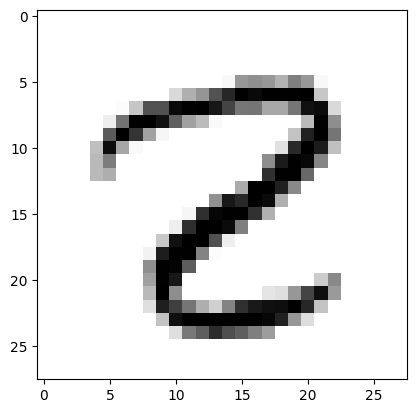

המספר הנכון: 2
המספר שנקבע: 0


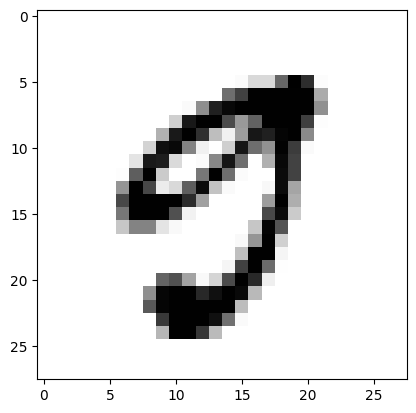

המספר הנכון: 9
המספר שנקבע: 1


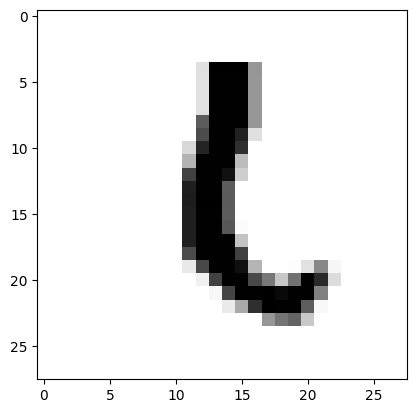

המספר הנכון: 6
המספר שנקבע: 3


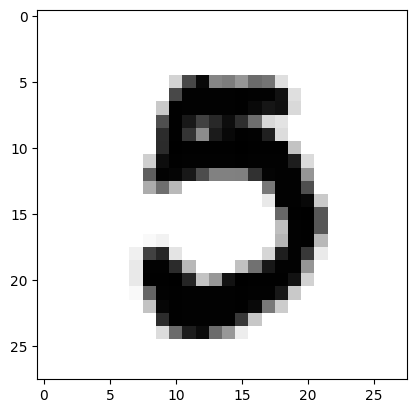

המספר הנכון: 5
המספר שנקבע: 7


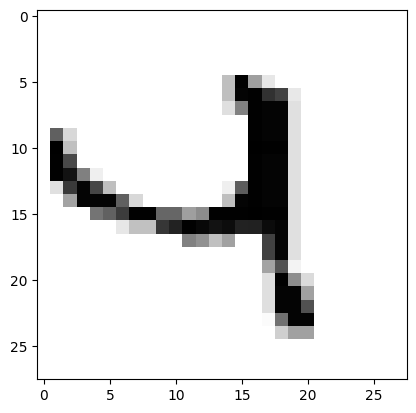

המספר הנכון: 4
המספר שנקבע: 0


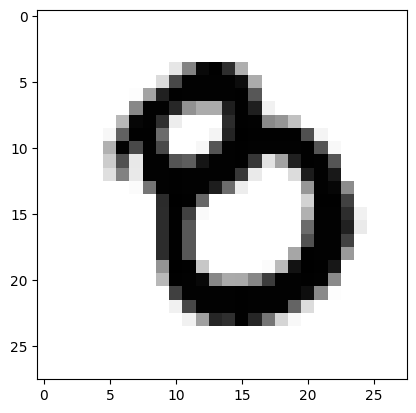

המספר הנכון: 8
המספר שנקבע: 2


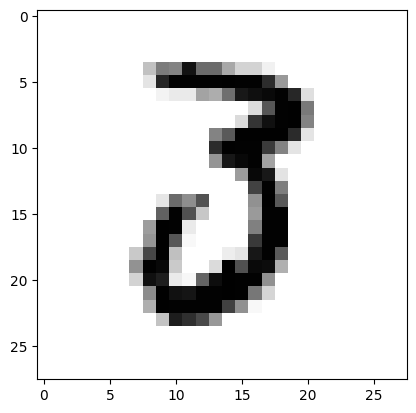

המספר הנכון: 3
המספר שנקבע: 5


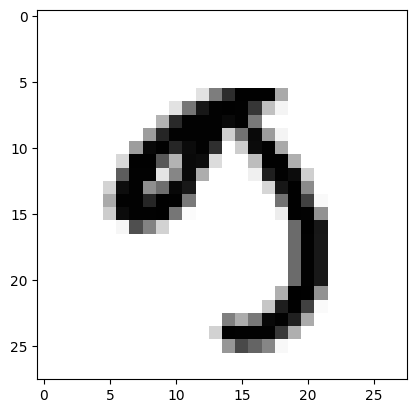

המספר הנכון: 9
המספר שנקבע: 5


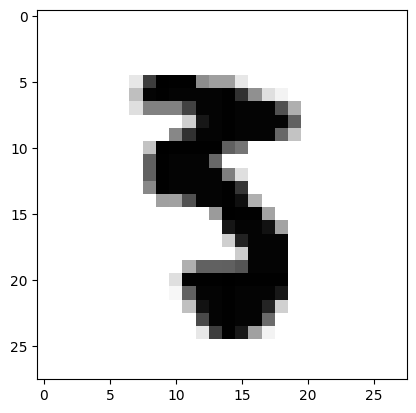

המספר הנכון: 3
המספר שנקבע: 8


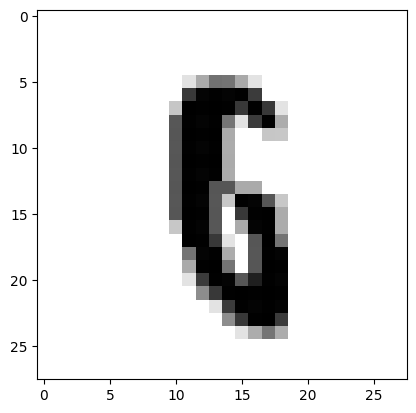

המספר הנכון: 6
המספר שנקבע: 8


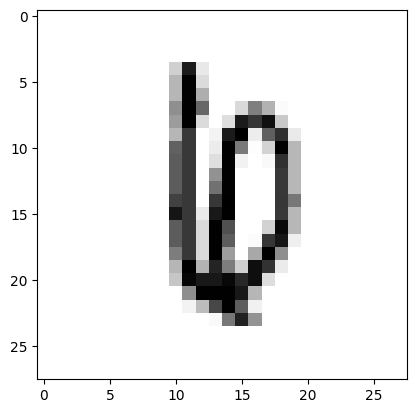

המספר הנכון: 6
המספר שנקבע: 2


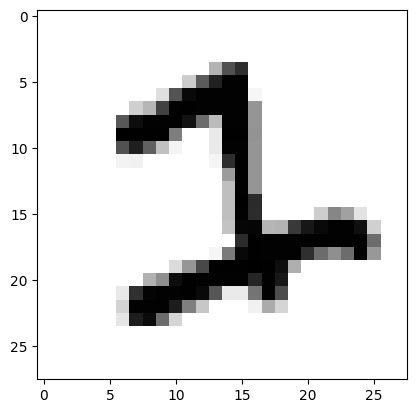

המספר הנכון: 1
המספר שנקבע: 0


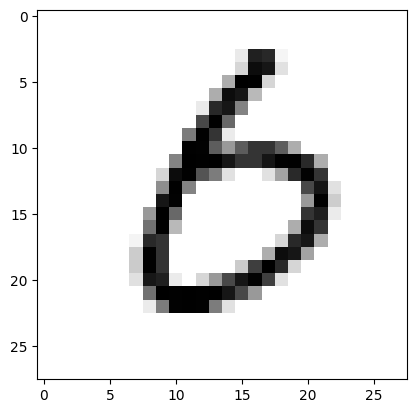

המספר הנכון: 6
המספר שנקבע: 2


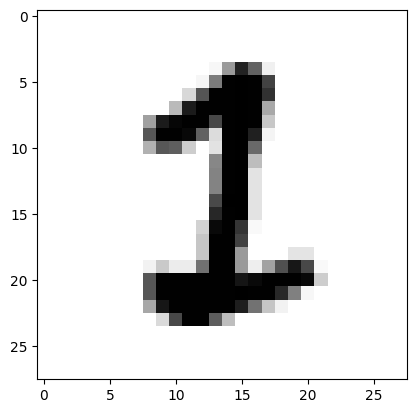

המספר הנכון: 1
המספר שנקבע: 9


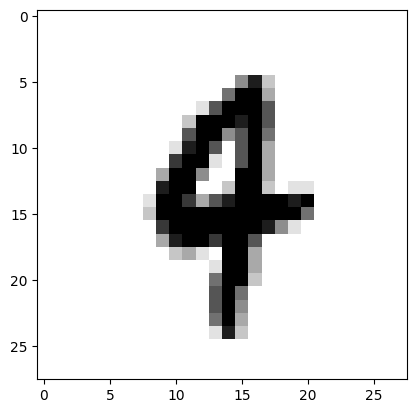

המספר הנכון: 4


In [12]:
mask = pred == y_test
print(mask)
x_false = x_test[~mask]
y_false = pred[~mask]
print(y_false)
print(f"{y_false.size} / {y_test.size}")
true_number = y_test[~mask]
for i in range(100):
  print(f'המספר שנקבע: {str(y_false[i])}')

  plt.imshow(x_false[i], cmap = plt.cm.binary)
  plt.show()
  
  print(f'המספר הנכון: {str(true_number[i])}')

# 